In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcard/creditcard.csv


In [2]:
#load the creditcard dataset
ds_cc = pd.read_csv('/kaggle/input/creditcard/creditcard.csv')

In [5]:
print(ds_cc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
ds_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
ds_cc['Class'].unique()

array([0, 1])

In [6]:
#finding missing values
print(ds_cc.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
#normalize the Amount and Time column
scaler = StandardScaler()

In [8]:
ds_cc['Time'] = scaler.fit_transform(ds_cc[['Time']])

ds_cc['Amount'] = scaler.fit_transform(ds_cc[['Amount']])

In [9]:
ds_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
print(ds_cc['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


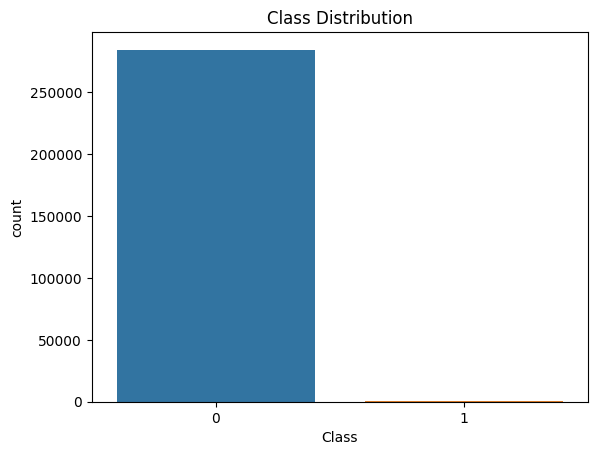

In [11]:
sns.countplot(x= 'Class', data = ds_cc)
plt.title("Class Distribution")
plt.show()

In [12]:
X = ds_cc.drop(columns = ['Class'])
y= ds_cc["Class"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y, random_state = 42)

In [14]:
#Train a Random Forest Model
rn_f = RandomForestClassifier(n_estimators = 100, random_state= 42)
rn_f.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [15]:
#Predictions
y_pred = rn_f.predict(X_test)


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
print(f'ROC AUC SCORE: { roc_auc_score(y_test,y_pred)}')

ROC AUC SCORE: 0.9081193007591333


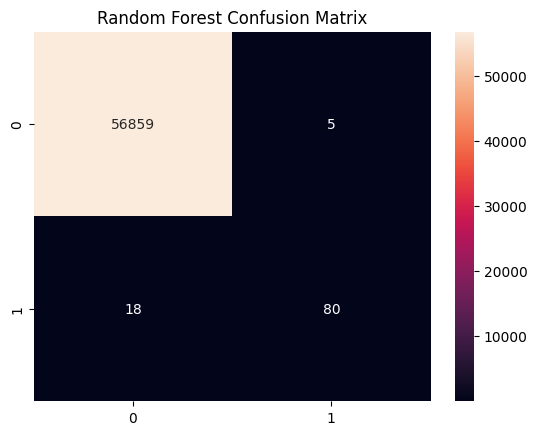

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt ='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [19]:
#Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_log_pred = log_reg.predict(X_test)

In [20]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
print(f'ROC AUC SCORE: { roc_auc_score(y_test,y_log_pred)}')

ROC AUC SCORE: 0.8264163044227257


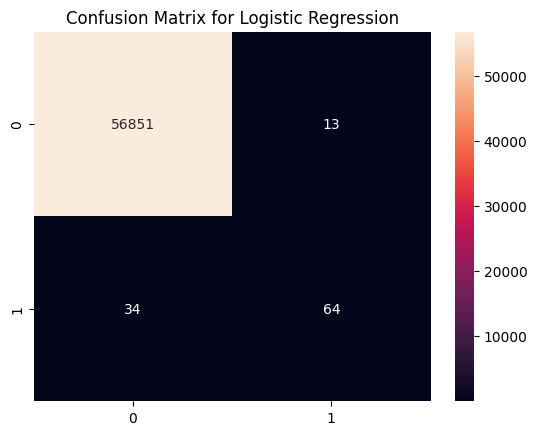

In [22]:
sns.heatmap(confusion_matrix(y_test,y_log_pred), annot = True, fmt ='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [23]:
#Train Gradient boosting Model
grdboost_mdl = GradientBoostingClassifier(n_estimators= 100, random_state= 42)
grdboost_mdl.fit(X_train, y_train)
yboost_pred = grdboost_mdl.predict(X_test)

In [24]:
print(classification_report(y_test,yboost_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
print(f'ROC AUC SCORE: { roc_auc_score(y_test,yboost_pred)}')

ROC AUC SCORE: 0.5916960481435117


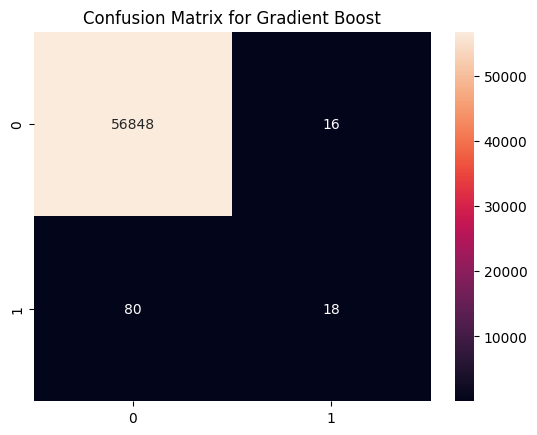

In [26]:
sns.heatmap(confusion_matrix(y_test,yboost_pred), annot = True, fmt ='d')
plt.title('Confusion Matrix for Gradient Boost')
plt.show()

In [29]:
#Train Xgboost Model
xgboost_mdl = XGBClassifier(use_label_encoder = False, eval_metrics = "logloss" )
xgboost_mdl.fit(X_train, y_train)
ygboost_pred = xgboost_mdl.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:31:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


In [30]:
print(classification_report(y_test,ygboost_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [31]:
print(f'ROC AUC SCORE: { roc_auc_score(y_test,ygboost_pred)}')

ROC AUC SCORE: 0.9029996741240109


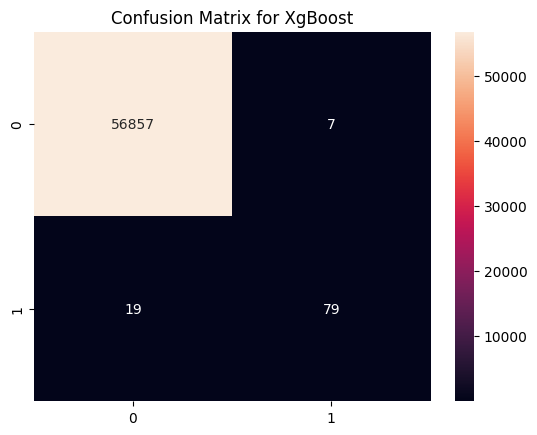

In [32]:
sns.heatmap(confusion_matrix(y_test,ygboost_pred), annot = True, fmt ='d')
plt.title('Confusion Matrix for XgBoost')
plt.show()


**RESULT**

When evaluating classification models for fraud detection, minimizing false positives is crucial, as misclassifying fraudulent transactions as non-fraudulent can lead to significant financial losses. Among the models analyzed based on their confusion matrices:  

- **XGBoost**: 19 false positives  
- **Gradient Boosting**: 80 false positives  
- **Logistic Regression**: 34 false positives  
- **Random Forest**: 18 false positives  

The **Random Forest model** emerges as the best-performing model, as it has the lowest number of false positives (18). This indicates that it minimizes financial risk while correctly identifying the highest number of fraudulent cases.